# Partial differential equations

Requirements
+ matplotlib
+ numpy
+ scipy

Optional
+ ipywidgets (for making interactive visualizations)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Numerical integration, quadrature, and boundary value problems

# Phase separation, initial value problems, and the Method of Lines


We want to solve [the Allen-Cahn equation](https://www.sciencedirect.com/science/article/abs/pii/0001616072900375), a single-variable partial differential equation describing spontaneous mixture or separation of two components of a binary mixture, such as two metals in an alloy. This initial value problem that is first-order in time and second-order in space,
$$
\dot{\rho}(\mathbf{r}, t) = D \nabla^2 \rho(\mathbf{r}, t) + \kappa * y * (1 - y^2)
$$
The scalar field $\rho$ denotes the relative concentration of the two alloys at a given region of space. The constant $D$ denotes the diffusivity of the scalar field $\rho(\mathbf{r}, t)$, while $\kappa$ determines the degree by which the two fluids avoid mixing with eachother (this would loosely correlate with surface tension).

Notice that, when $\kappa = 0$, this problem reduces to the heat equation. Conversely, when $D = 0$, we no longer have any spatial structure in the problem, and can solve it as though it were an ODE. We can thus see that there are two competing terms in the AC equation:  The diffusion term penalizes gradients and causes the two mixtures to intermix over time, becuase diffusion penalizes inhogeneity. However, this term competes with the reaction term, which encourages the dominant mixture at a given point to excluse the other. 

In order to solve this equation, we need to specify the initial conditions. For ordinary differential equations $\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t), t)$, an initial value problem consists of specifying the initial conditions $\mathbf{x}(0)$, and then solving for $\mathbf{x}(t)$ for future times $t$. For a PDE, solving an initial value problem requires specifying the initial value of a scalar field $\rho(\mathbf{r}, 0)$


Our approach will be to use the method of lines. This semi-discretization approach consists of explicitly discretizing the spatial lattice, thereby reducing the problem to solving a set of coupled ODEs describing each lattice site at a given time. In the heat equation, the only portion of the eqation that couples together different lattice sites is the Laplace operator, and so we seek a discrete approximation of this term in the equation.

If we assume that we are working in two-dimensions, then we will replace $\rho(\mathbf{r}, t)$ with $\rho_{ij}(t)$, which denotes the lattice site at location $i$ and $j$ on a square lattice. We therefore can approximate the Laplace operator using first-order central finite differences.

$$
\nabla^2 \rho(\mathbf{r}, t) \approx (\rho_{i + 1, j}(t) - 2 \rho_{ij}(t) + \rho_{i - 1, j}) + (\rho_{i, j + 1}(t) - 2 \rho_{ij}(t) + \rho_{i, j - 1}(t))      \\
\nabla^2 \rho(\mathbf{r}, t) \approx \rho_{i + 1, j}(t) + \rho_{i, j + 1}(t) - 4 \rho_{ij}(t) + \rho_{i - 1, j}(t) + \rho_{i, j - 1}(t)
$$

Where we have used the Cartesian identity $\nabla^2 = \dfrac{\partial^2}{\partial x^2} + \dfrac{\partial^2}{\partial y^2}$ in order to sum the one-dimensional discrete Laplace operators


Note that, in practice, we are free to use a [higher-order approximation](https://en.wikipedia.org/wiki/Finite_difference_coefficient)---and, for certain meshes, it might make sense to use a higher order operator. On an uneven mesh, it may even make sense to adaptively choose the order of our approximation based on $\delta x$, the local lattice spacing. But, in practice, it usually makes the most sense to use the first-order approximation.

We can now write our heat equation in terms of our discrete Laplace operator,

$$
(1/ D)\dot{\rho}_{ij}(t) = \rho_{i + 1, j}(t) + \rho_{i, j + 1}(t) - 4 \rho_{ij}(t) + \rho_{i - 1, j}(t) + \rho_{i, j - 1}(t)
$$

This equation basically specifies a set of coupled ordinary differential equations, where individual equations are specified by two indices $ij$ instead of a single index. All that we need to do now is discretize the initial values of the field, by sampling its values at the different lattice sites: $\rho(\mathbf{r}, t) \rightarrow \rho_{ij}(0)$.

One ambiguity that we need to specify will be our choice of boundary conditions---what happens at the edges of our solution domain? If our indice $i$ and $j$ have values $i,j \in \{0, 1, ..., N\}$, then we need a principled choice for the behavior of the discrete Laplace operator when $i,j < 0$ or $i, j > N$. 
Depending on the type of problem, boundary conditions can be classified as either:
1. Dirichlet: the value of $\rho$ is specified on the boundary.
2. Neumann: the value of $\nabla \rho$ is specified on the boundary.

Mixtures of these boundary conditions, as well as higher-order combinations, also exist. For example, in fluid dynamics we often encounter equations that obey a no-slip and no-flux boundary condition. The no-slip boundary condition specifies that the velocity of a fluid is always zero along a direction tangential to a boundary, thus representing a Dirichlet condition along the tangential direction. However, the no-flux boundary condition specifies that fluid cannot penetrate the boundary along the direction perpendicular to the boundary, thus representing a Neumann boundary condition.

Now that we've discretized our equation and figured out our boundary conditions, we are ready to numerically solve the heat equation using the exact same tricks we used to solve ODEs. We can choose whatever ODE solver that we prefer, including Euler's method, Runge-Kutta, or even variable-step or implicit methods. Here, rather than worrying about our choice of solver, we are going to use the `scipy` package's built-in ODE solver `solve_ivp`, which provides a consistent API for a whole suite of different ODE solution methods.

We will use a square domain, and we will use a particular type of Neumann boundary conditions: reflection. We specify that the derivative of $\rho$ equal zero along all directions perpendicular to the boundary, $\nabla \rho \cdot \hat{\mathbf{t}} = 0$. 

The [Cahn-Hilliard equation](https://dspace.mit.edu/bitstream/handle/1721.1/100188/10-626-spring-2011/contents/lecture-notes/MIT10_626S11_lec38.pdf) is a more sophisticated model of phase separation, which is more widely used in modern works. This equation contains higher order terms in $\nabla$ than the Allen-Cahn equation, allowing a richer range of dynamical behaviors, such as spinoidal decomposition  and critical opalescence.

### To Do

1. Implement the Allen-Cahn equation using the method of lines. I'd recommend implementing just the diffusion portion first, and checking that it works, before adding on the reaction term.
2. Describe how varying $D$ and $kappa$ change the properties of your solution. Is this consistent with your intuition for special cases in which this equation is solvable?
3.  If you are familiar with Photoshop, you have probably used a tool called a ["Gaussian blur,"](https://www.youtube.com/watch?v=ri8RVzhHYoA) which blurs image details in a manner reminiscent of camera blur. This method is occasionally used in the analysis of experimental microscopy images, or even one-dimensional time series, in order to remove high-freuqency information. The results of a Gaussian blur of fixed radius look very reminiscent of applying the raw diffusion equation ($\kappa=0$) to our initial conditions for a fixed duration. Using what you know about analytical results for the heat equation, can you guess why this might be the case?

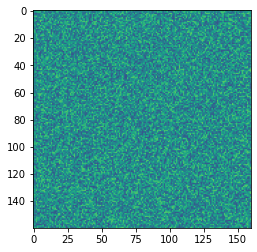

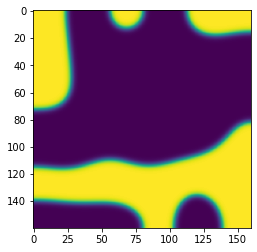

In [27]:
from scipy.integrate import odeint, solve_ivp

class AllenCahn:
    """
    An implementation of the Allen-Cahn equation in two dimensions, using the method
    of lines.
    """

    def __init__(self, nx, ny, kappa=1.0, d=1.0, Lx=1.0, Ly=1.0):
        self.nx = nx
        self.ny = ny
        self.dx = Lx / nx
        self.dy = Ly / ny
        self.d = d
        self.kappa = kappa
       
    def _laplace(self, grid):
        """
        Apply the two-dimensional Laplace operator to a square array
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  My 10 line solution is vectorized in numpy, and so it avoids using a for loop 
        #
        #
        ################################################################################
        
        lap = np.zeros((self.ny, self.nx))

        # enforce reflection boundary conditions by padding rows and columns
        grid = np.vstack([grid[0, :][None, :], grid, grid[-1, :][None, :]])
        grid  = np.hstack([grid[:, 0][:, None], grid, grid[:, -1][:, None]])

        lap = grid[:-2, 1:-1] + grid[1:-1, :-2] + grid[2:, 1:-1] + grid[1:-1, 2:]
        lap  -= 4 * grid[1:-1, 1:-1]
        
        lap /= self.dx * self.dy
        return lap

    def _reaction(self, y):
        """
        Bistable reaction term
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  My solution one line 
        #
        #
        ################################################################################
        return y * (1 - y**2)

    def rhs(self, t, y):
        """
        For technical reasons, this function needs to take a one-dimensional vector, 
        and so we have to reshape the vector back into the mesh
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  My solution is three lines, and it calls the private methods
        #
        #
        ################################################################################
        y = y.reshape((self.ny, self.nx))
        out = self.kappa * self._reaction(y) + self.d * self._laplace(y)
        return out.flatten()


    def solve(self, y0, t_min, t_max, nt, **kwargs):
        """
        Solve the heat equation using the odeint solver

        **kwargs are passed to scipy.integrate.solve_ivp
        """
        ################################################################################
        #
        #
        #  YOUR CODE HERE
        #  My solution is five lines, and it mainly involves setting things up to be
        #  passed to scipy.integrate.solve_ivp, and then returning the results
        #
        #
        ################################################################################
        tpts = np.linspace(t_min, t_max, nt)
        out = solve_ivp(self.rhs, (t_min, t_max), y0.flatten(), t_eval=tpts, **kwargs)
        sol = out.y.T
        tpts =  out.t
        return tpts, sol.reshape((len(tpts), self.ny, self.nx))



## Run an example simulation and plot the before and after
np.random.seed(0)
ic = np.random.random((160, 160)) - 0.5
model = HeatEquation(*ic.shape, kappa=1e1, d=1e-3)
tpts, sol = model.solve(ic, 0, 8, 400, method="DOP853")


plt.figure()
plt.imshow(sol[0], vmin=-1, vmax=1)

plt.figure()
plt.imshow(sol[-1], vmin=-1, vmax=1)


In [28]:
## Make an interactive video
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    # plt.close()
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(sol[i], vmin=-1, vmax=1, cmap="coolwarm")
    plt.show()



interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(sol) - 1, 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=399), Output()), _…

<function __main__.plotter(i)>

#### Extras

In [51]:
# (Optional) I use this code to export still images, and then make a video from them using
# the command-line tool ffmpeg


for i in range(len(sol)):
    plt.figure()
    plt.imshow(sol[i], vmin=-1, vmax=1, cmap="coolwarm")
    out_path = "private_dump/frame" + str(i).zfill(4) + ".png"


    ax = plt.gca()
    ax.set_axis_off()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.set_aspect(1, adjustable='box')

    plt.savefig(out_path, bbox_inches='tight', pad_inches=0.02, dpi=160)
    plt.close()



In [31]:
# (Optional) I used this code to stitch the images together into a video. The %%bash magic tells
# iPython to treat these lines as bash commands, rather than Python. I then use the 
# command-line tool `ffmpeg` to stitch the images together into a video.

%%bash
ffmpeg -r 60 -i private_dump/frame%04d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -vcodec libx264 -pix_fmt yuv420p private_dump/vid2.mov


SyntaxError: invalid syntax (2942280542.py, line 6)

# Burgers' equation



In [ ]:

class GrayScott:
    """
    Simulate coupled Gray Scott oscillators
    """
    
    def __init__(self, pattern_set, mu=0.3, v0=0, p=5, d=1.0, d1=0.0, d2=0.0):
        """
        pattern_set : a list of binary vectors corresponding to patterns to be learned
        lam : 0.3 the steady state current
        d : float, the coupling strength
        d1, d2 : floats, the diffusion coefficients
        """
        self.n = len(pattern_set[0])
        self.d1, self.d2 = d1, d2
        self.d = d
        self.mu = mu
        self.v0 = v0
        self.p = p
        self.k = self.build_couplings(pattern_set)
        
        
        
    def build_couplings(self, pattern_list):
        """
        For orthonormal pattern basis, this implements an elementwise
        XNOR
        """
        k0 = np.zeros((self.n, self.n))
        for item in pattern_list:
            rp = item
            rp_term = 2*rp - 1 #xnor
            k0 += rp_term[np.newaxis, :]*rp_term[:, np.newaxis]
        return self.d*np.heaviside(k0, 0)*k0
        
        
        
    def __call__(self, x, t):
        
        u, v = x[:self.n], x[self.n:]
        
        udot = 1 - u - self.mu*u*v**2
        vdot = self.v0 - self.p*v + self.mu*u*v**2
        
        udiff = (u[np.newaxis, :] - u[:, np.newaxis])
        vdiff = (v[np.newaxis, :] - v[:, np.newaxis])
        
        k = self.k
        
        udot += np.sum(k*udiff, axis=1)
        vdot += np.sum(k*vdiff, axis=1)
        
        ## diffusion term
        udot += self.d1*(np.roll(u, 1) - 2*u +  np.roll(u, -1))
        vdot += self.d2*(np.roll(v, 1) - 2*v +  np.roll(v, -1))
        
        return np.hstack([udot, vdot])
    
    def integrate(self, x0, tpts):
        """
        x0 : the initial values of the components
        tpts : np.array, the time mesh
        """
        sol = odeint(self, x0, tpts)
        return sol.T


    

# Turing's model of morphogenesis

Reaction-diffusion equations are sets of partial differential equations describing interactions among multiple coupled fields.$^*$ Each field's dynamical equation contains an interaction term with the other field, and a self-only term describing diffusion in space. 


Reaction diffusion equations pop up in many contexts---

Here, we are going to visit one of the most elegant examples of reaction-diffusion dynamics. In 1952, Alan Turing used reaction-diffusion equations to propose [a model of morphogenesis](https://www.dna.caltech.edu/courses/cs191/paperscs191/turing.pdf)--the process by which cheetahs get their spots, or leaves develop their unique shapes. While conventional thinking about biological systems leads to the false intution that every detail of the patterns on a zebra is programmed by an elaborate genetic circuit, Turing's model suggests that two interacting chemical fields created early during the development of an organism can spontaneously produce nature-like patterning

One minimal example of a reaction-diffusion equation is the Gray-Scott model, which describes a synthesis reaction between two species:

$$
U + 2 V \rightarrow 3 V
$$

On a slower timescale, a second reaction occurs

$$
V \rightarrow P
$$

Where $P$ is an inert product representing the byproduct of the reaction. 

If this reaction occurs across a spatial domain, then we can write two scalar fields, $u(\mathbf{r}, t)$ and $v(\mathbf{r}, t)$ describing the concentrations of the two chemical species across space.

$$
\dot u = - u v^2 + F(1 - u) + D_u \nabla^2 u    \\
\dot v = u v^2 - (F + k) v + D_v \nabla^2 v
$$



Turing's work is particularly elegant because, as a trained computer scientist, he did not have extensive biological background---he simply thought about the problem very clearly and proposed a clean minimal model consistent with observations. The generality of Turing's model for arbitrary biological systems remains a topic of research, but the reaction-diffusion model has been experimentally-tested and even directly manipulated in certain systems---including angelfish patterns, XXX, and, very recently, in lizard skins.


## Spectral methods

We start by taking the Fourier transform of both sides of our equations
$$
\dot u = - u v^2 + F(1 - u) - D_u k^2 u    \\
\dot v = u v^2 - (F + k) v - D_v k^2 v
$$


### To Do

+ Implement Turing's model of morphogenesis in Python, using the spectral method. I've included the outline of my solution below, but feel free to structure your code differently.
+ How does XXXX affect your solution? Does this make sense?
+ Evolutionary biologists have speculated that the spacing of stripes on zebra XX arises due to natural selection. If we suppose that zebra stripes form via a Turing instability in Gray-Scott equations in early development, which parameter of the Gray-Scott equations would evolutionary forces most strongly act upon?
+ You likely noticed that we glazed over the issue of boundary condiions. Projecting the PDE onto a Fourier basis implicitly assumes that we are working on a toroidal domain (a donut, in the case of a 2D system). For Dirichlet boundary conditions, a better choice of basis functions would be [Chebyshev polynomials](https://people.maths.ox.ac.uk/trefethen/8all.pdf). How do you expect our results would change, if we used basis functions that respect Dirichlet conditions?

$^*$ Some authors describe one-component reaction diffusion equations, but in my view these are basically just diffusion equations with forcing. These normally don't exhibit the kinds of intriguing spatial dynamics we explore here. However, depending on their parameters, these equations can product travelling, soliton-like fronts, which have been used to describe everything from epidemic spread, to propogation of beneficial genetic mutations, to XXX

One option would be to manually convert the frequency-domain representation of the field back to real space, compute the reaction term, and then convert it back to real space once *at each timestep*. However, as you can imagine, this method is a bit expensive---we saw before that the fast fourier transform and the inverse transform both have time complexity of $\mathcal{O}(N \log N)$, where $N$ is the number of mesh points.

In practice, we'd therefore expect that working in the frequency domain might slightly slow down our solver, although it might yield other benefits, such as greater stability, or the ability to use larger timesteps or coarser mesh sizes.

However, it turns out that we can do slightly better by using analytical tools to better formulate our problem





There exists plenty of analytical tools for studying reaction-diffusion systems. The basic idea is to work in the spatial frequency domain, and then find a diffusion-driven instability that causes a single frequency component to exponentially dominate the others. The classic text for understanding Turing patterns is 
[Murray Mathematical biology](http://pcleon.if.ufrgs.br/pub/listas-sistdin/MurrayI.pdf) (See Chapter 2).

In [466]:
np.hstack([np.arange(10/2+1), np.arange(1-10/2, 0)])

array([ 0.,  1.,  2.,  3.,  4.,  5., -4., -3., -2., -1.])

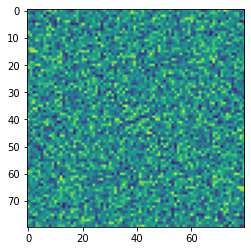

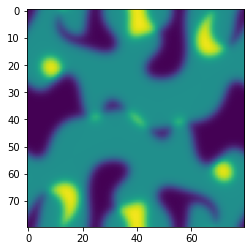

In [25]:
from scipy.integrate import odeint, solve_ivp

class GrayScott:
    """
    Simulate the two-dimensional Gray-Scott model
    """
    def __init__(self, nx, ny, d=1.0, kappa=1.0, Lx=1.0, Ly=1.0):
        self.nx, self.ny = nx, ny
        self.dx = Lx / nx
        self.dy = Ly / ny
        self.d = d
        self.kappa = kappa

        
        kx = (np.pi / Lx) * np.hstack([np.arange(nx / 2 + 1), np.arange(1 - nx / 2, 0)])
        ky = (np.pi / Ly) * np.hstack([np.arange(ny / 2 + 1), np.arange(1 - ny / 2, 0)])
        self.kx, self.ky = kx, ky

        kxx, kyy = np.meshgrid(kx, ky)
        ksq = kxx**2 + kyy**2
        self.ksq = ksq.flatten()

        self.d = d

        
    def _reaction(self, y):
        """
        Bistable reaction term: cast into real space, perform reaction, and then cast
        back into Fourier space.
        """
        ########
        #
        # Your code here. 
        #
        ########
        y = np.reshape(y, (self.ny, self.nx))
        yh = np.fft.ifft2(y)
        out = np.fft.fft2(yh * (1 - yh**2))
        return out.flatten()

    def rhs(self, t, y):
        """
        For technical reasons, this function needs to take a one-dimensional vector, 
        and so we have to reshape the vector back into the mesh
        """
        # uv2 = u * (v**2)
        # rhs_u = -uv2 + a * (1 - u)
        # rhs_v = uv2 - b * v
        # return rhs_u, rhs_v
        #y = y.reshape((self.ny, self.nx))

        out = self.kappa * self._reaction(y) - self.d * self.ksq  * y

        return out#.flatten()


    def solve(self, y0, t_min, t_max, nt, **kwargs):
        """
        Solve the heat equation using the odeint solver

        **kwargs are passed to scipy.integrate.solve_ivp
        """
        tpts = np.linspace(t_min, t_max, nt)
        y0_k = np.fft.fft2(y0)

        # uhat = np.fft.fft2(u);
        # vhat = np.fft.fft2(v);

        out = solve_ivp(self.rhs, (t_min, t_max), y0_k.flatten(), t_eval=tpts, **kwargs)
        sol = out.y.T
        tpts =  out.t
        return tpts, sol
        

np.random.seed(0)
ic = 2 * (np.random.random((80, 80)) - 0.5)
model = GrayScott(*ic.shape, kappa=1e0, d=1e-3)
tpts, sol = model.solve(ic, 0, 12, 50, method="DOP853")
sol = np.real(sol)

sol2 = list()
for row in sol:
    sol2.append(np.fft.ifft2(row.reshape(*ic.shape)))
sol2 = np.real(np.array(sol2))

sol = sol2


plt.figure()
plt.imshow(sol2[0], vmin=-1, vmax=1)

plt.figure()
plt.imshow(sol2[-1], vmin=-1, vmax=1)

    # def __call__(self, t, X):
        
        
        
    #     udot = 1 - u - self.mu*u*v**2
    #     vdot = self.v0 - self.p*v + self.mu*u*v**2
        
    #     udiff = (u[np.newaxis, :] - u[:, np.newaxis])
    #     vdiff = (v[np.newaxis, :] - v[:, np.newaxis])
        
    #     k = self.k
        
    #     udot += np.sum(k*udiff, axis=1)
    #     vdot += np.sum(k*vdiff, axis=1)
        
    #     ## diffusion term
    #     udot += self.d1*(np.roll(u, 1) - 2*u +  np.roll(u, -1))
    #     vdot += self.d2*(np.roll(v, 1) - 2*v +  np.roll(v, -1))
        
    #     return np.hstack([udot, vdot])

    # http://faculty.washington.edu/rjl/classes/am590a2013/_static/Fourier-Spectral.pdf


In [26]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    # plt.close()
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(sol[i], vmin=-1, vmax=1, cmap="coolwarm")
    plt.show()



interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(sol) - 1, 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=49), Output()), _d…

<function __main__.plotter(i)>

In [453]:
N = 40
h = 1j*np.hstack((np.arange(0 ,N/2+1), np.arange(-N/2+1, 0)))

h * h




array([   0.+0.j,   -1.+0.j,   -4.+0.j,   -9.+0.j,  -16.+0.j,  -25.+0.j,
        -36.+0.j,  -49.+0.j,  -64.+0.j,  -81.+0.j, -100.+0.j, -121.+0.j,
       -144.+0.j, -169.+0.j, -196.+0.j, -225.+0.j, -256.+0.j, -289.+0.j,
       -324.+0.j, -361.+0.j, -400.+0.j, -361.+0.j, -324.+0.j, -289.+0.j,
       -256.+0.j, -225.+0.j, -196.+0.j, -169.+0.j, -144.+0.j, -121.+0.j,
       -100.+0.j,  -81.+0.j,  -64.+0.j,  -49.+0.j,  -36.+0.j,  -25.+0.j,
        -16.+0.j,   -9.+0.j,   -4.+0.j,   -1.+0.j])

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.,
       121., 144., 169., 196., 225., 256., 289., 324., 361., 400., 361.,
       324., 289., 256., 225., 196., 169., 144., 121., 100.,  81.,  64.,
        49.,  36.,  25.,  16.,   9.,   4.,   1.])

In [ ]:
Nx =64; % number of modes
Ny=64;
Nz=64;
% set up grid
Nt=4;
tmax=0.04;
Lx = 1.5;       % period  2*pi * L
Ly =1.5;
Lz=1.5;
dt = tmax/Nt;   % number of time slices
tol=0.1^12;
A = 0.04;
B = 0.1;
Du = 1.;
Dv = 1.;
% initialise variables
x = (2*pi/Nx)*(-Nx/2:Nx/2 -1)'*Lx;      % x coordinate
y = (2*pi/Ny)*(-Nx/2:Ny/2 -1)'*Ly;
z = (2*pi/Nz)*(-Nx/2:Nz/2 -1)'*Lz;
kx = i*[0:Nx/2-1 0 -Nx/2+1:-1]'/Lx;     % wave vector
ky = i*[0:Ny/2-1 0 -Ny/2+1:-1]'/Ly;
kz = i*[0:Nz/2-1 0 -Nz/2+1:-1]'/Lz;
[xx,yy,zz]=meshgrid(x,y,z);
[kxx,kyy,kzz]=meshgrid(kx,ky,kz);
% initial conditions
t=0; tdata(1)=t;
u = 0.2 + exp(-2*(xx.^2+yy.^2+zz.^2));
v = 0.1 + exp(-4*(xx.^2+yy.^2+zz.^2-0.01).^2);

gamma=[1];
Ahat=A*fftn(ones(size(xx)));
t=0;
figure(11); clf;
subplot(2,1,1);
H = vol3d('CData',real(u),'texture','3D','XData',x,'YData',y,'ZData',z);
xlabel('x'); ylabel('y'); zlabel('z'); colorbar;
axis equal; axis square; view(3);

xlabel('x'); ylabel('y'); zlabel('z');
axis equal; axis square; view(3); drawnow;
title(['Time ',num2str(t)]);
subplot(2,1,2);
H = vol3d('CData',real(v),'texture','3D','XData',x,'YData',y,'ZData',z);
xlabel('x'); ylabel('y'); zlabel('z'); colorbar;
axis equal; axis square; view(3);

xlabel('x'); ylabel('y'); zlabel('z');
axis equal; axis square; view(3); drawnow;
filename=['./pictures1/',num2str(10000000),'.jpg'];
saveas(11,filename)


for n=1:Nt
    chg=1;
    for m=1:1
        % use fixed point iteration to solve nonlinear system in real space
        chg=1;
        uold=u; vold=v;
        while (chg>tol)
            utemp=u; vtemp=v;
            umean=0.5*(u+uold);
            vmean=0.5*(v+vold);
            u=uold+0.5*gamma(m)*dt*(-umean.*vmean.^2);
            v=vold+0.5*gamma(m)*dt*umean.*vmean.^2;
            chg=max(abs(u-utemp))+max(abs(v-vtemp));
        end
        uhat=fftn(u); vhat=fftn(v); % solve linear part exactly in Fourier space
        uhat=exp(gamma(m)*dt*(-A+Du*(kxx.^2+kyy.^2+kzz.^2))).*...
            (uhat-Ahat./(A+Du*(kxx.^2+kyy.^2+kzz)))+Ahat./...
            (A+Du*(kxx.^2+kyy.^2+kzz.^2));
        vhat=exp(gamma(m)*dt*(-B+Dv*(kxx.^2+kyy.^2+kzz.^2))).*vhat;
        u=ifftn(uhat); v=ifftn(vhat);
        % use fixed point iteration to solve nonlinear system in real space
        chg=1;
        uold=u; vold=v;
        while (chg>tol)
            utemp=u; vtemp=v;
            umean=0.5*(u+uold);
            vmean=0.5*(v+vold);
            u=uold+0.5*gamma(m)*dt*(-umean.*vmean.^2);
            v=vold+0.5*gamma(m)*dt*umean.*vmean.^2;
            chg=max(abs(u-utemp))+max(abs(v-vtemp));
        end
    end
    t=n*dt;
    figure(11); clf;
    subplot(2,1,1);
    H = vol3d('CData',real(u),'texture','3D','XData',x,'YData',y,'ZData',z);
    xlabel('x'); ylabel('y'); zlabel('z'); colorbar;
    axis equal; axis square; view(3);
    
    xlabel('x'); ylabel('y'); zlabel('z');
    axis equal; axis square; view(3); drawnow;
    title(['Time ',num2str(t)]);
    subplot(2,1,2);
    H = vol3d('CData',real(v),'texture','3D','XData',x,'YData',y,'ZData',z);
    xlabel('x'); ylabel('y'); zlabel('z'); colorbar;
    axis equal; axis square; view(3);
    
    xlabel('x'); ylabel('y'); zlabel('z');
    axis equal; axis square; view(3); drawnow;
    filename=['./pictures1/',num2str(1000000+n),'.jpg'];
    saveas(11,filename)


def def GS(params,initial_matrices):
    Du,Dv,k,F,dt,dx = params['Du'],params['Dv'],params['k'],params['F'],params['dt'],params['dx']
    U, V = initial_matrices
    u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]
    for i in range(n):
        Lu,Lv = laplacian_operator(U,V,dx)
        uvv = u*v*v
        su = Du*Lu - uvv + F *(1-u)
        sv = Dv*Lv + uvv - (F+k)*v
        u += dt*su
        v += dt*sv

        if movieOutput:
            #Some manually set initial frames to grab so we can see how the system evolves early on
            if i % frameMod == 0 or i in [1,2,3,4,5,10,15,20,30,40,50,60,70,80,90,100,110,120,150]:
                makeImg(v,"v_" + str(i),params["myCmap"],setEdge=params["edgeMax"])
                if i % 1000*frameMod == 0:
                    print str(i)

    return u,v

# Run Tests to see that everything is working

In [24]:
import sys, os, unittest
from datetime import datetime

class TestPowerMethod(unittest.TestCase):

    def test_initialization(self):
        method = PowerMethod(max_iter=13)
        assert method.max_iter == 13

    def test_fitting(self):
        assert True

    def test_eigspec(self):
        np.random.random((5,5))


print(print(os.getcwd()))
print(datetime.now().strftime("%H:%M:%S"))

unittest.main(argv=[''], exit=False)



...

/Users/williamgilpin/Documents/courses/phys381c_fall2022/hw1
None
21:32:53



----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


In [ ]:
## We are going to do something super challenging: we are going to implement a random forest
## from scratch. 